In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import gdown 
from pandas.plotting import scatter_matrix


#### Reading solar farm data

In [10]:
# Download and read benin solar farm dataset
gdown.download("https://drive.google.com/uc?id=1YEMWlwjHTJPpvpraHmdXGI_Hcihslv-r", output='../data/benin-dataset.csv', quiet=False)
benin_df = pd.read_csv("../data/benin-dataset.csv")

Downloading...
From: https://drive.google.com/uc?id=1YEMWlwjHTJPpvpraHmdXGI_Hcihslv-r
To: /Users/yo/Documents/solar-farm-eda-and-statistical-analysis/data/benin-dataset.csv



































































100%|██████████| 46.8M/46.8M [00:21<00:00, 2.13MB/s]


In [11]:
benin_df.head(3)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   

   Comments  
0       NaN  
1       NaN  
2       NaN

#### Summary Statistics

In [12]:
benin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [13]:
# Calculating statistical measures and informations for Benin dataset
benin_df.select_dtypes(include=["number"]).describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

#### Data Quality Check

**Checking for Missing Values**

As we can see below the only feature with missing values is `Comments`. 100% of the data ar null.
Decision: Since handling features with significant missing values lead the model to overfiting and miss learning we
can drop it.

In [14]:
# Missing values in Benin dataset
benin_df.isnull().sum()[benin_df.isnull().sum() > 0] / benin_df.shape[0] * 100

Comments    100.0
dtype: float64

**Checking for outliers**

In [15]:
# Checking for outliers with IQR method
def detect_outlier_iqr(df: pd.DataFrame): 
    outlier_col = {}
    for col in df.select_dtypes('number'):
        q1 = df[col].abs().quantile(0.25)
        q3 = df[col].abs().quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Get the outliers
        outlier_col[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count() / df.shape[0] * 100
    return outlier_col

# Outliers in Benin dataset
outliers = detect_outlier_iqr(benin_df)
print('Outlier percentage for each features:')
for col, percent in outliers.items():
    if percent > 0:
        print(f"{col}: {percent:.2f}%")

Outlier percentage for each features:
GHI: 0.03%
DNI: 2.95%
DHI: 1.83%
ModA: 0.02%
ModB: 0.05%
Tamb: 0.04%
WS: 1.28%
WSgust: 1.02%
WSstdev: 20.43%
WDstdev: 1.38%
BP: 1.96%
Cleaning: 0.09%
Precipitation: 0.72%
TModA: 0.00%
TModB: 0.05%


**Checking Incorrect Entries**

In [16]:
# Checking all have numeric data types 
print('Non numeric datatype in Benin dataset: ', benin_df.select_dtypes('object').columns)

Non numeric datatype in Benin dataset:  Index(['Timestamp'], dtype='object')


In [17]:
# Checking for incorrect entries values
def detect_out_of_range(df: pd.DataFrame):
    out_of_range = {}
    for col in df.select_dtypes('number').columns:
        count = df[(df[col] < 0)][col].count() 
        if count > 0:
            out_of_range[col] = df[(df[col] < 0)][col].count() / df.shape[0] * 100
    return out_of_range

# Out-of-range values in Benin dataset
off_ranges =  detect_out_of_range(benin_df)
print('Out-of-range percentage for each features:')
for col, percent in off_ranges.items():
    print(f"{col}: {percent:.2f}%")

Out-of-range percentage for each features:
GHI: 49.25%
DNI: 52.51%
DHI: 49.31%


In [18]:

# Identify duplicate
# Identify duplicate rows in Benin dataset
print('Duplicat columns in benin dataset: ', benin_df.duplicated().sum())

Duplicat columns in benin dataset:  0


#### Time Series Analysis

Monthly Patterns of GHI, DNI, DHI, and Tamb python Copy code

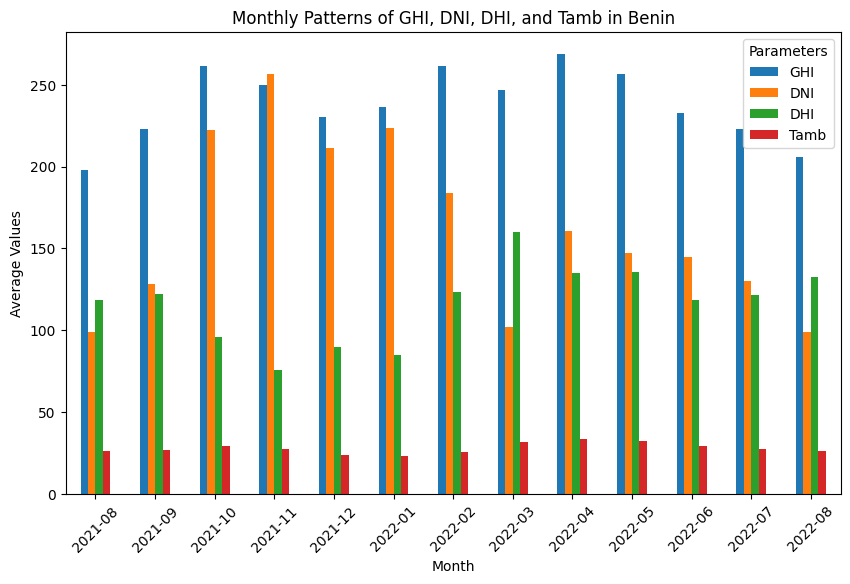

In [19]:
def monthly_trend(df, title):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Group by Month (using Timestamp)
    monthly_data = df.groupby(df['Timestamp'].dt.to_period('M'))[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    # Plot
    monthly_data.plot(kind='bar', figsize=(10, 6), title=title)
    plt.ylabel('Average Values')
    plt.xlabel('Month')
    plt.xticks(rotation=45)  # Rotate x-axis for better visibility
    plt.legend(title='Parameters')
    plt.show()

# Monthly trend for Benin dataset
monthly_trend(benin_df, 'Monthly Patterns of GHI, DNI, DHI, and Tamb in Benin')


Daily Trends of Solar Irradiance and Temperature

  0%|          | 0.00/46.8M [03:47<?, ?B/s]


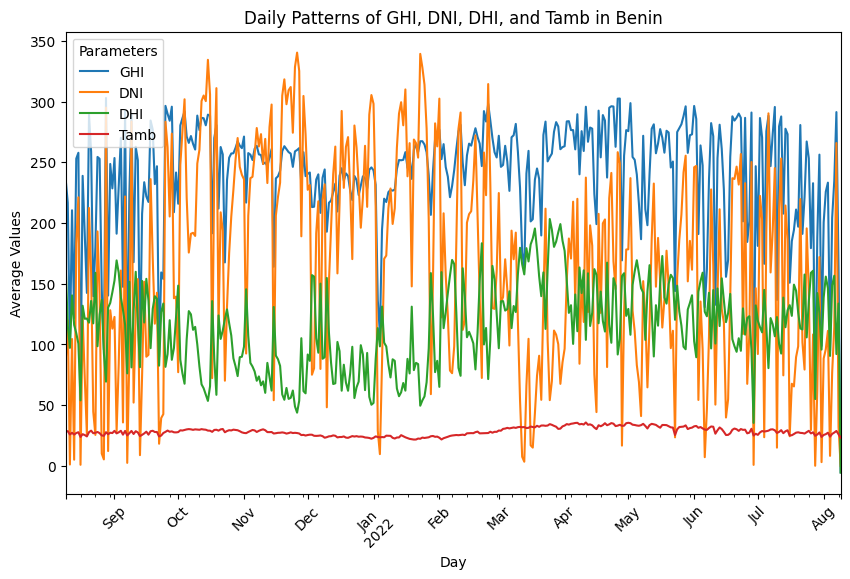

In [20]:
def daily_trend(df, title):
    # Group by Day (using Timestamp)
    daily_data = df.groupby(df['Timestamp'].dt.to_period('D'))[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    # Plot
    daily_data.plot(kind='line', figsize=(10, 6), title=title)
    plt.ylabel('Average Values')
    plt.xlabel('Day')
    plt.xticks(rotation=45)  # Rotate x-axis for better visibility
    plt.legend(title='Parameters')
    plt.show()

# Daily trend for Benin dataset
daily_trend(benin_df, 'Daily Patterns of GHI, DNI, DHI, and Tamb in Benin')

Impact of Cleaning on Sensor Readings Over Time

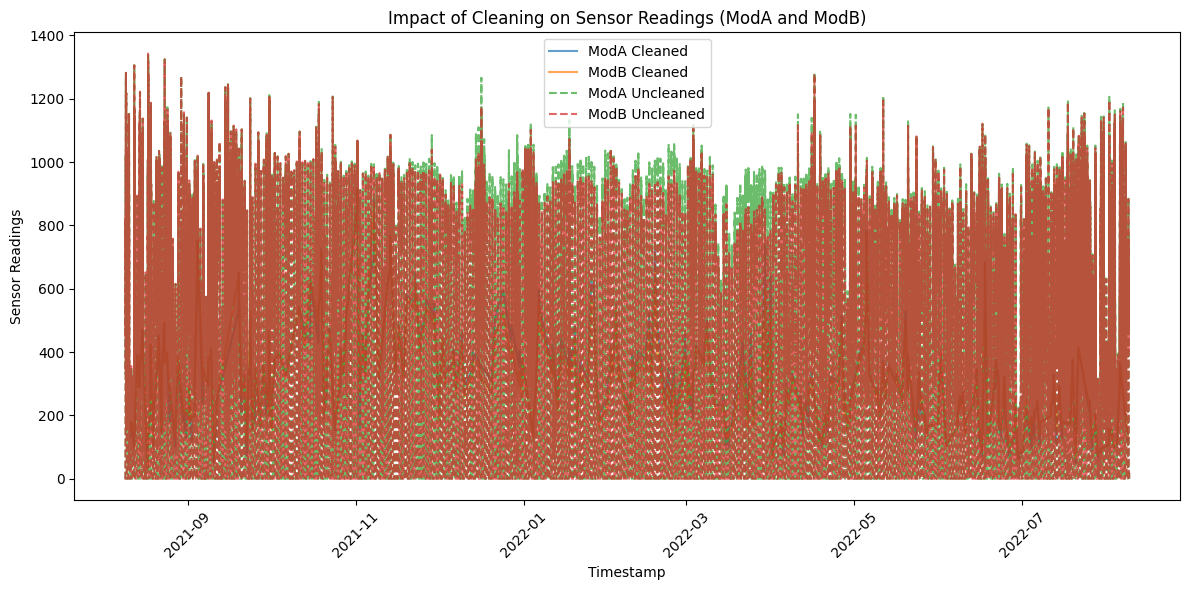

In [21]:
def cleaning_impact_over_time(df):
    # Filter data by Cleaning status
    cleaned_data = df[df['Cleaning'] == 1]
    uncleaned_data = df[df['Cleaning'] == 0]

    # Plot Cleaned vs. Uncleaned ModA and ModB
    plt.figure(figsize=(12, 6))

    # Cleaned Data
    plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA Cleaned', alpha=0.7)
    plt.plot(cleaned_data['Timestamp'], cleaned_data['ModB'], label='ModB Cleaned', alpha=0.7)

    # Uncleaned Data
    plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA Uncleaned', alpha=0.7, linestyle='--')
    plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModB'], label='ModB Uncleaned', alpha=0.7, linestyle='--')

    plt.legend()
    plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB)')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Readings')
    plt.xticks(rotation=45)  # Rotate timestamps for better visibility
    plt.tight_layout()
    plt.show()

# Cleaning impact over time for Benin dataset
cleaning_impact_over_time(benin_df)


#### Correlation Analysis

In [22]:
rad_components = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
temp_measures = ['TModA', 'TModB']
wind_conditions = ['WS', 'WD', 'WSgust']


**Correlation analysis between irradiation components and temprature measures**

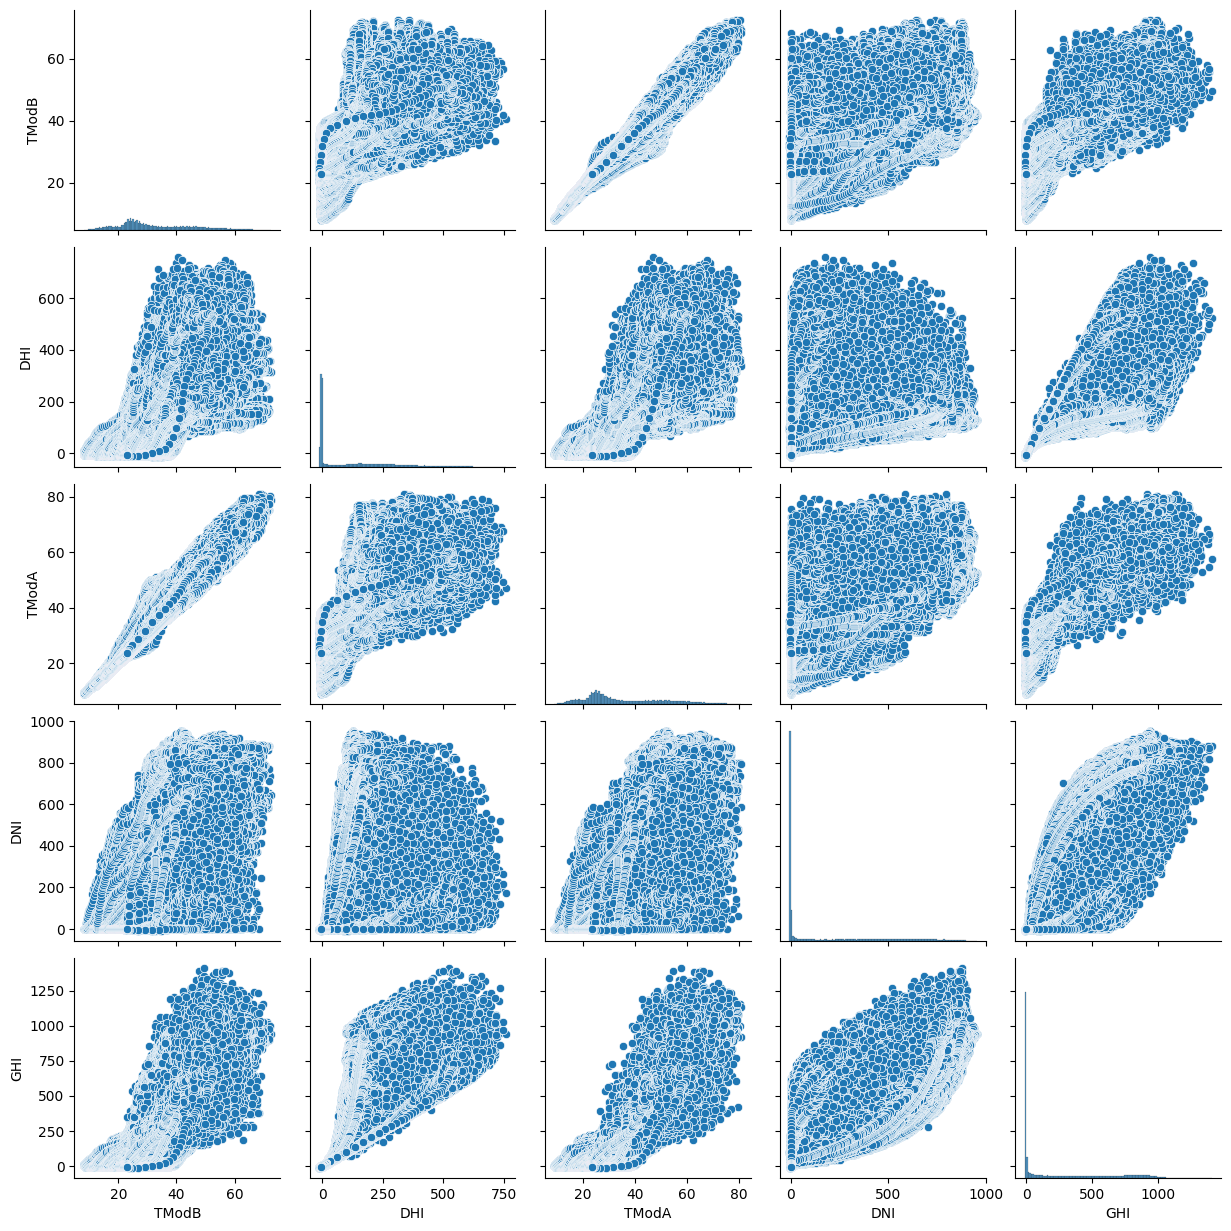

GHI       DNI       DHI     TModA     TModB     TModA     TModB
GHI    1.000000  0.882376  0.849989  0.920127  0.874338  0.920127  0.874338
DNI    0.882376  1.000000  0.546602  0.790340  0.756007  0.790340  0.756007
DHI    0.849989  0.546602  1.000000  0.825012  0.777829  0.825012  0.777829
TModA  0.920127  0.790340  0.825012  1.000000  0.983443  1.000000  0.983443
TModB  0.874338  0.756007  0.777829  0.983443  1.000000  0.983443  1.000000
TModA  0.920127  0.790340  0.825012  1.000000  0.983443  1.000000  0.983443
TModB  0.874338  0.756007  0.777829  0.983443  1.000000  0.983443  1.000000

In [23]:
#Correlation analysis for Benin dataset
sns.pairplot(benin_df[list(set(rad_components + temp_measures))])
plt.show()
benin_df[rad_components + temp_measures].corr() 

**Scatter matrix analysis between solar irradiance and wind conditions**

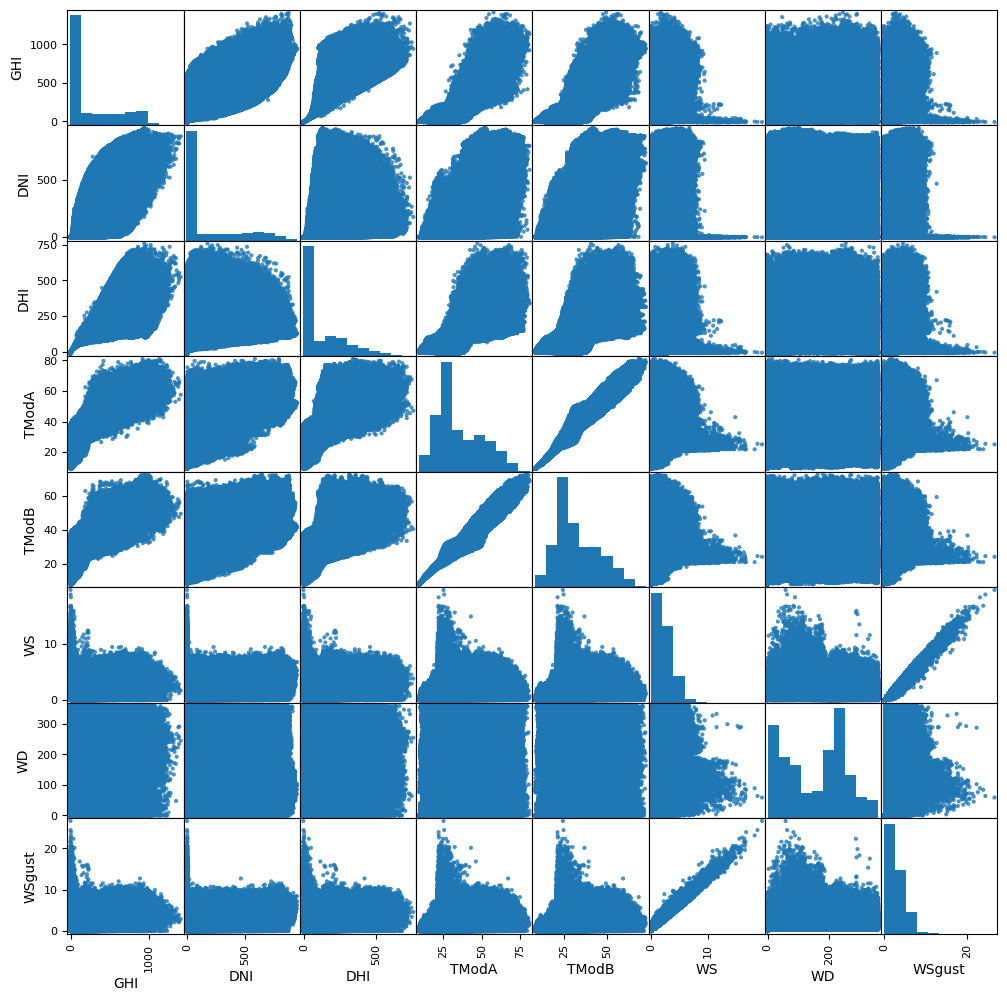

In [24]:
# Correlation analysis for Benin dataset
scatter_matrix(benin_df[rad_components + wind_conditions], alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.show()

#### Wind Analysis

/var/folders/jn/0b_xwd412532nmd6152zbw1w0000gp/T/ipykernel_750/2707813450.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_summary = benin_df.groupby(direction_bins)['WS'].mean()


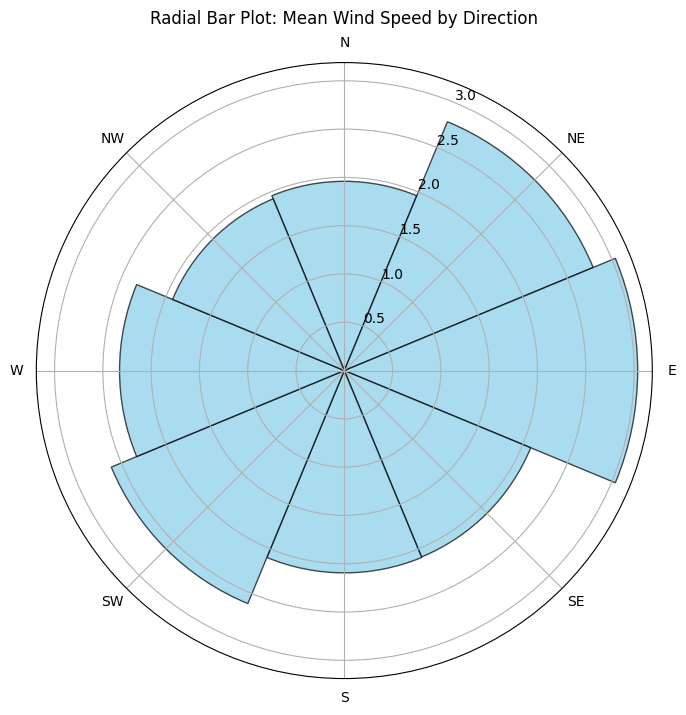

In [25]:
# Aggregate wind benin_df by direction bins
direction_bins = pd.cut(benin_df['WD'], bins=np.arange(0, 361, 45), labels=np.arange(0, 360, 45))
wind_summary = benin_df.groupby(direction_bins)['WS'].mean()

# Radial bar plot benin_df
angles = np.deg2rad(np.arange(0, 360, 45))  # Convert to radians
values = wind_summary.values

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
bars = ax.bar(angles, values, width=np.pi/4, color="skyblue", edgecolor="black", alpha=0.7)

# Customizing plot
ax.set_theta_zero_location('N')  # North at the top
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_xticks(angles)
ax.set_xticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW"])
plt.title("Radial Bar Plot: Mean Wind Speed by Direction", va='bottom')
plt.show()


#### Temperature Analysis

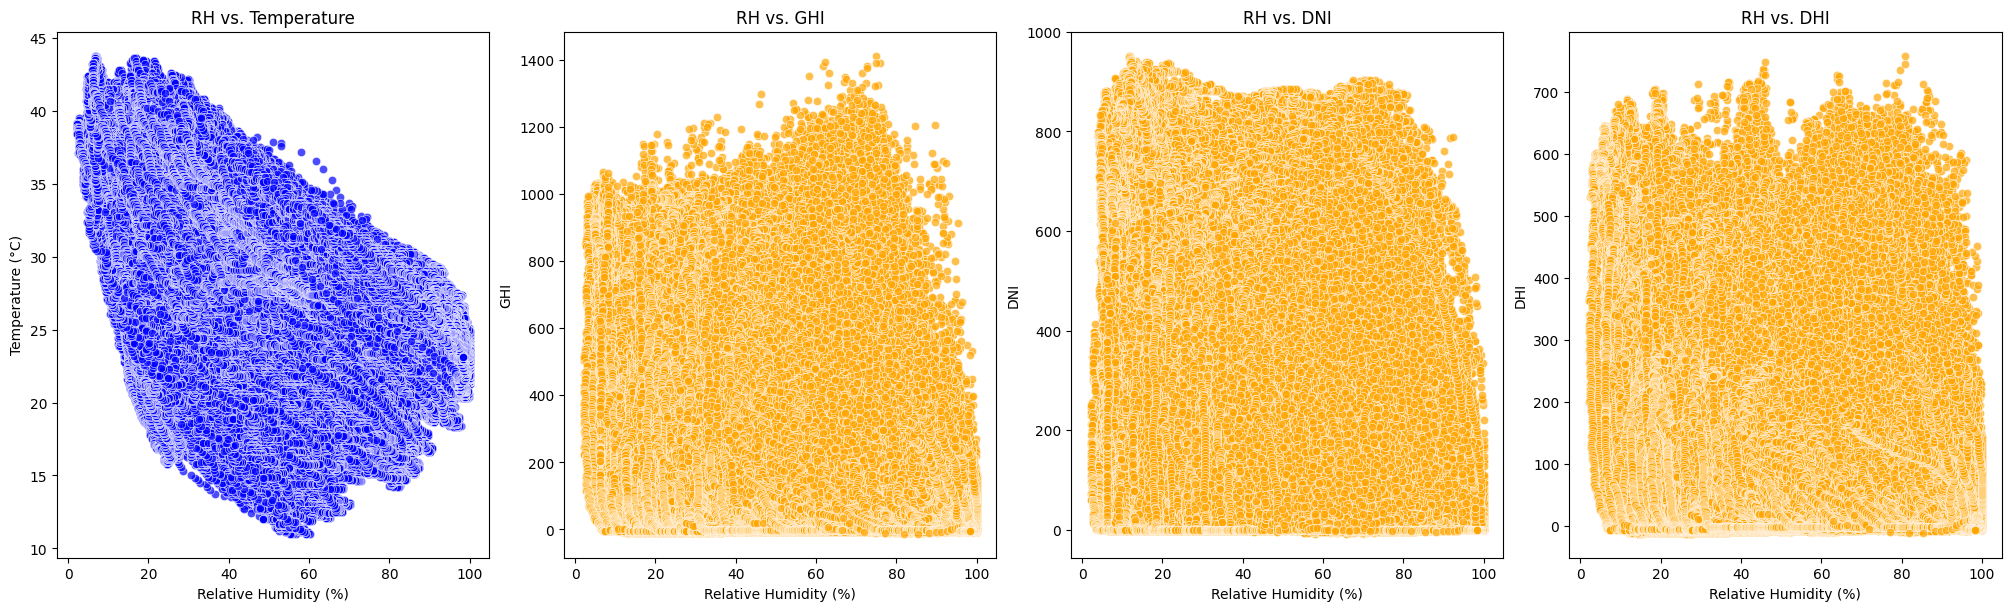

In [26]:
def plot_scatter(df):
    # Define variables
    solar_vars = ['GHI', 'DNI', 'DHI']  # Solar radiation variables
    temperature_var = 'Tamb'
    humidity_var = 'RH'

    # Set up the horizontal layout for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(solar_vars) + 1, figsize=(5 * (len(solar_vars) + 1), 6), constrained_layout=True)

    # Plot RH vs. Temperature
    sns.scatterplot(x=df[humidity_var], y=df[temperature_var], ax=axes[0], color='blue', alpha=0.7)
    axes[0].set_title('RH vs. Temperature')
    axes[0].set_xlabel('Relative Humidity (%)')
    axes[0].set_ylabel('Temperature (°C)')

    # Plot RH vs. each Solar Radiation variable
    for i, solar_var in enumerate(solar_vars):
        sns.scatterplot(x=df[humidity_var], y=df[solar_var], ax=axes[i + 1], color='orange', alpha=0.7)
        axes[i + 1].set_title(f'RH vs. {solar_var}')
        axes[i + 1].set_xlabel('Relative Humidity (%)')
        axes[i + 1].set_ylabel(solar_var)

    plt.show()

# Scatter plot for Benin dataset
plot_scatter(benin_df)

#### Frequency Distribution of irradation and temprature

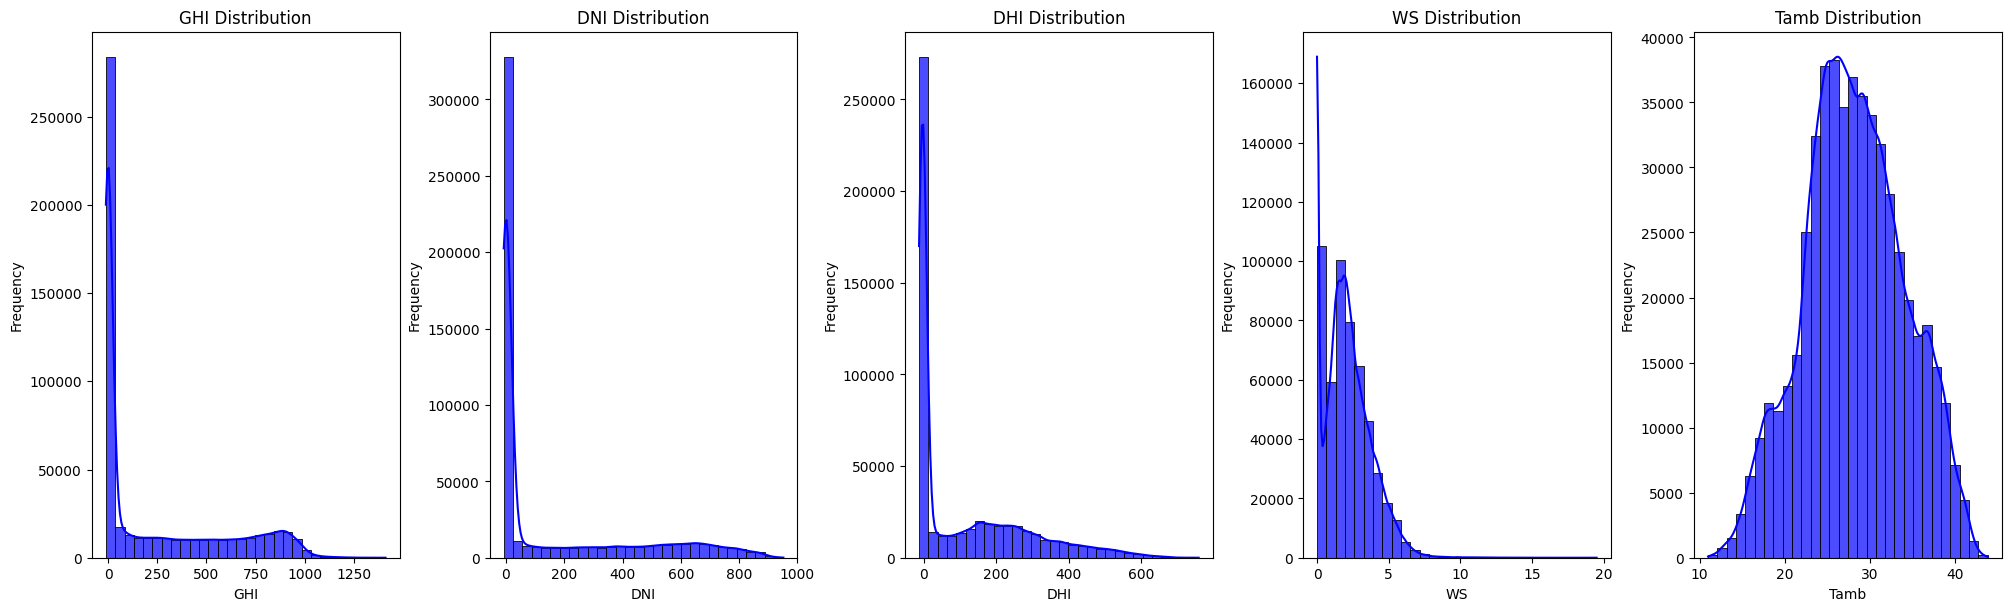

In [27]:
def frequency_distribution(df):

    # Define the variables to plot histograms for
    variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']  # Update with your column names

    # Set up the horizontal layout for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(4 * len(variables), 6), constrained_layout=True)

    # Loop through the variables and plot histograms
    for ax, var in zip(axes, variables):
        sns.histplot(df[var], bins=30, kde=True, ax=ax, color='blue', alpha=0.7)
        ax.set_title(f'{var} Distribution', fontsize=12)
        ax.set_xlabel(var, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

    plt.show()
    
# Frequency distribution for Benin dataset
frequency_distribution(benin_df)

#### Z-Score Analysis

In [28]:
def z_score(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number)

    # Calculate Z-scores for all numeric columns
    z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()
    anomalies = (z_scores.abs() > 3)

    return anomalies.sum()[anomalies.sum() > 0]

# Z-scores for Benin dataset
print('Z-scores for Benin dataset: ', z_score(benin_df))

Z-scores for Benin dataset:  GHI                89
DHI              3738
ModA               27
ModB               63
WS               3109
WSgust           3500
WSstdev          5653
WDstdev          4765
BP                865
Cleaning          485
Precipitation    1402
TModA              10
TModB              98
dtype: int64


#### Explor complete relationship with Bubble charts

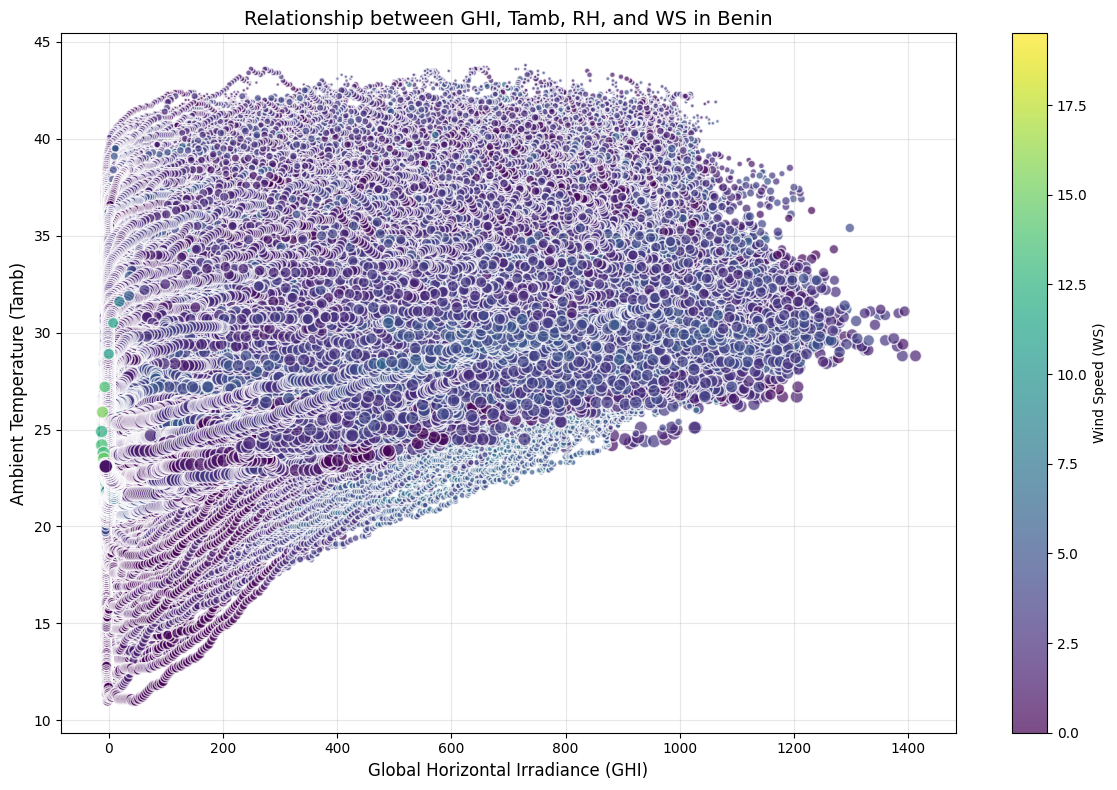

In [29]:
def explor_relationship(df, title):

    # Example variables in your dataset
    x = df['GHI']       
    y = df['Tamb']      
    bubble_size = df['RH']  
    color = df['WS']     

    # Scale bubble sizes for better visibility
    scaled_bubble_size = bubble_size / bubble_size.max() * 100

    # Create the bubble chart
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x, y, s=scaled_bubble_size, c=color, cmap='viridis', alpha=0.7, edgecolors='w')

    # Add a color bar to show the wind speed
    cbar = plt.colorbar(scatter)
    cbar.set_label('Wind Speed (WS)')

    # Set chart title and axis labels
    plt.title(title, fontsize=14)
    plt.xlabel('Global Horizontal Irradiance (GHI)', fontsize=12)
    plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)

    # Show the plot
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
# Relationship between GHI, Tamb, RH, and WS in Benin dataset
explor_relationship(benin_df, 'Relationship between GHI, Tamb, RH, and WS in Benin')

#### Data Cleaning

**Handling Missing Values**

In [30]:
# Droping Comment Feature
benin_df.drop(columns='Comments', axis=1, inplace=True)

**Droping Duplicate Values**

In [31]:
benin_df.drop_duplicates(inplace=True)

**Handling Incorrect Entries**

In [45]:
# Filling negative values with zero in GHI, DNI, DHI
benin_df[['GHI', 'DNI', 'DHI']] = benin_df[['GHI', 'DNI', 'DHI']].clip(lower=0)